<a href="https://colab.research.google.com/github/Pierre-Loic/ADL_module_Python_datascience/blob/master/Defi_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Défi des parties 6 et 7

Le but de l'exercice est de comprendre le jeu de données issues du World Happiness Report (pour les années 2015 à 2019) à l'aide de graphiques. Pour les questions 2 et 3, vous devez afficher un graphique à l'aide de **matplotlib** ou de **seaborn**.

1 - Regrouper les données issues des 5 fichiers CSV (WHR_2015.csv, ...) dans un seul dataframe avec une colonne supplémentaire pour l'année 

In [56]:
import pandas as pd
import seaborn as sns
import missingno as mgno


data_global=[]

for Y in range(2015,2020):
    
  dfi = pd.DataFrame()
  dfi = pd.read_csv("WHR_"+str(Y)+".csv")
  dfi["year"] = Y
  
  data_global.append(dfi) 


dfg = pd.concat(data_global)
dfg["year"] = dfg["year"].astype("category")
print(dfg["year"].value_counts())
dfg.info()


2015    158
2016    157
2019    156
2018    156
2017    155
Name: year, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Country                        470 non-null    object  
 1   Region                         315 non-null    object  
 2   Happiness Rank                 315 non-null    float64 
 3   Happiness Score                315 non-null    float64 
 4   Standard Error                 158 non-null    float64 
 5   Economy (GDP per Capita)       315 non-null    float64 
 6   Family                         470 non-null    float64 
 7   Health (Life Expectancy)       315 non-null    float64 
 8   Freedom                        470 non-null    float64 
 9   Trust (Government Corruption)  315 non-null    float64 
 10  Generosity                     782 non-null    float64 
 11  Dystopia Res

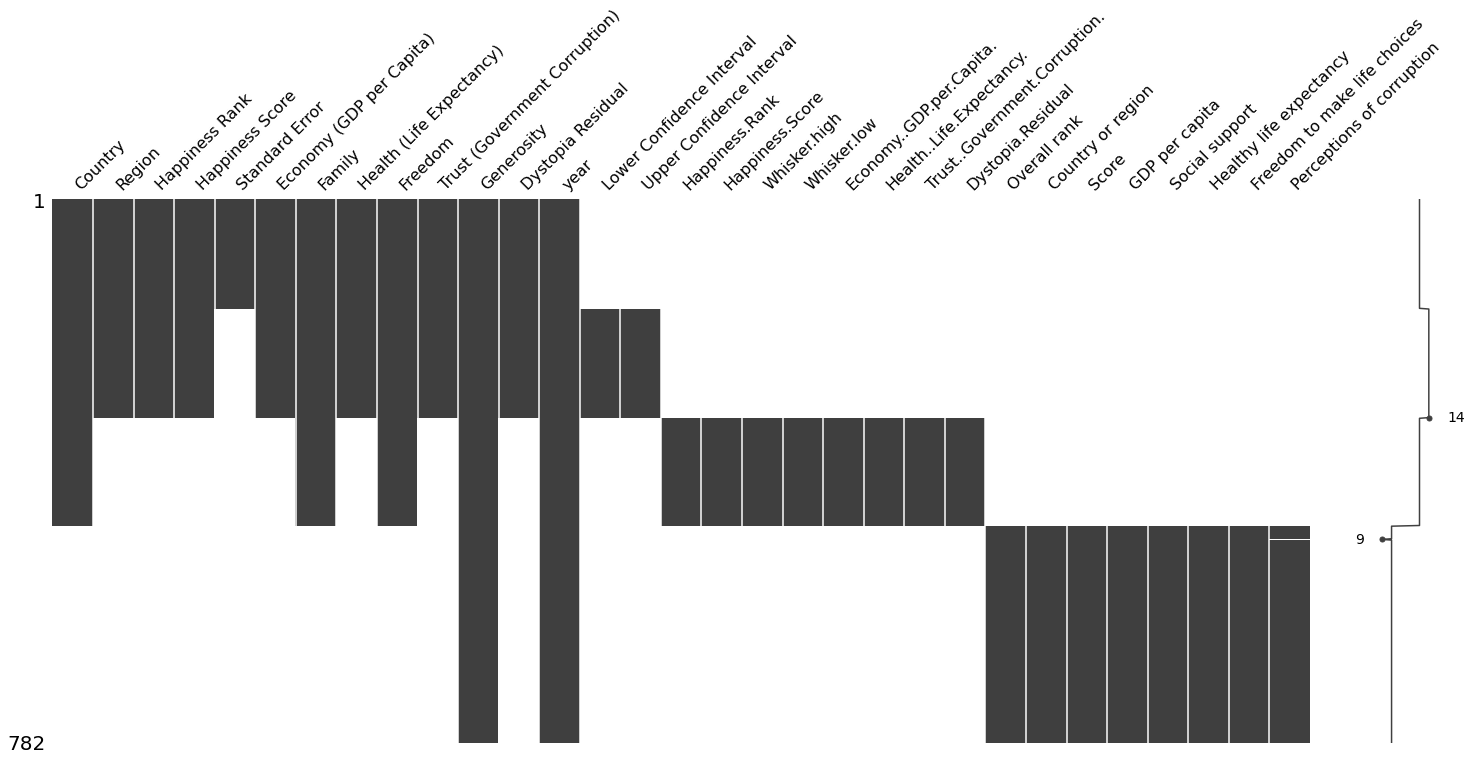

In [57]:
mgno.matrix(dfg)

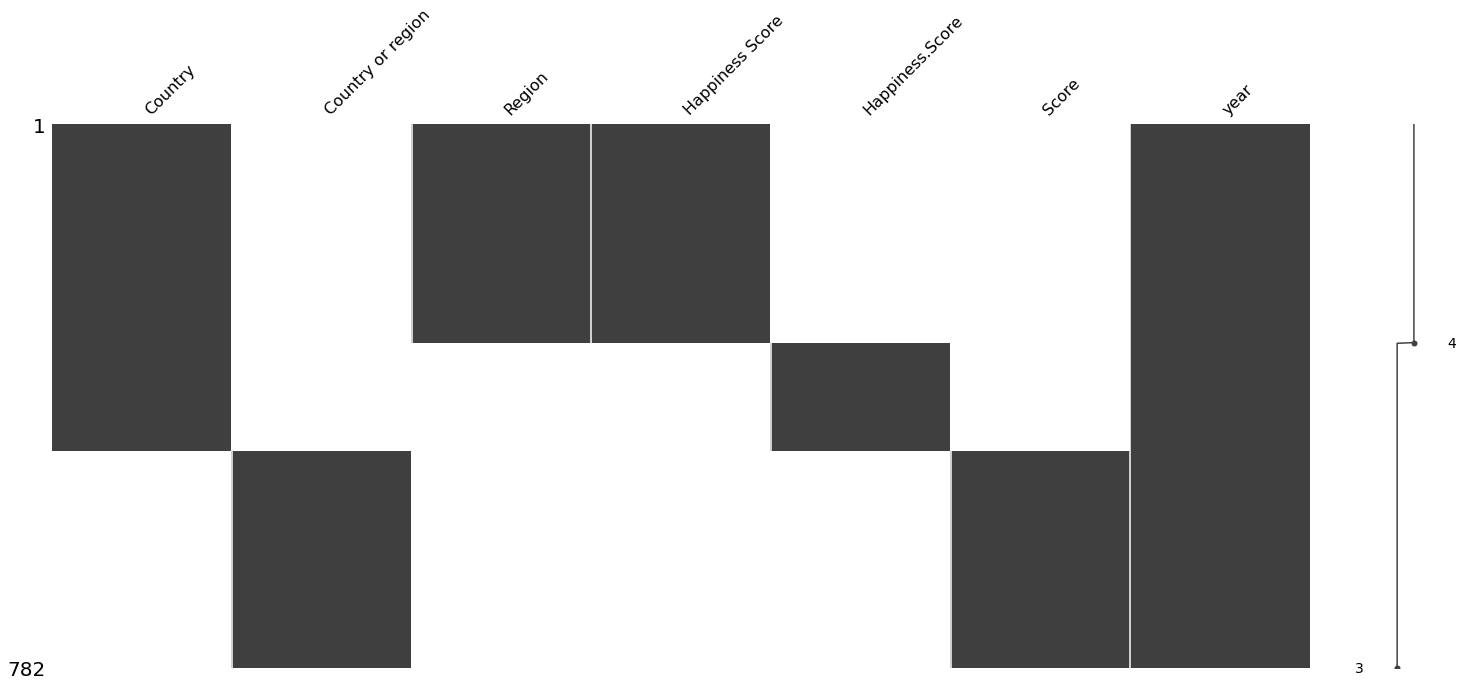

In [58]:
df_useful = dfg[["Country","Country or region","Region","Happiness Score","Happiness.Score","Score","year"]]
mgno.matrix(df_useful)

In [59]:
df_useful["HScore"] = df_useful[["Happiness Score","Happiness.Score","Score"]].sum(axis=1)
df_useful.head()

<ipython-input-59-2741add10897>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful["HScore"] = df_useful[["Happiness Score","Happiness.Score","Score"]].sum(axis=1)


,Country,Country or region,Region,Happiness Score,Happiness.Score,Score,year,HScore
0,Switzerland,NaN,Western Europe,7.587,NaN,NaN,2015,7.587
1,Iceland,NaN,Western Europe,7.561,NaN,NaN,2015,7.561
2,Denmark,NaN,Western Europe,7.527,NaN,NaN,2015,7.527
3,Norway,NaN,Western Europe,7.522,NaN,NaN,2015,7.522
4,Canada,NaN,North America,7.427,NaN,NaN,2015,7.427


In [60]:
df_useful = df_useful.drop(["Happiness Score","Happiness.Score","Score"], axis="columns")
print(df_useful.info())
df_useful.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Country            470 non-null    object  
 1   Country or region  312 non-null    object  
 2   Region             315 non-null    object  
 3   year               782 non-null    category
 4   HScore             782 non-null    float64 
dtypes: category(1), float64(1), object(3)
memory usage: 31.5+ KB
None


,Country,Country or region,Region,year,HScore
0,Switzerland,NaN,Western Europe,2015,7.587
1,Iceland,NaN,Western Europe,2015,7.561
2,Denmark,NaN,Western Europe,2015,7.527
3,Norway,NaN,Western Europe,2015,7.522
4,Canada,NaN,North America,2015,7.427


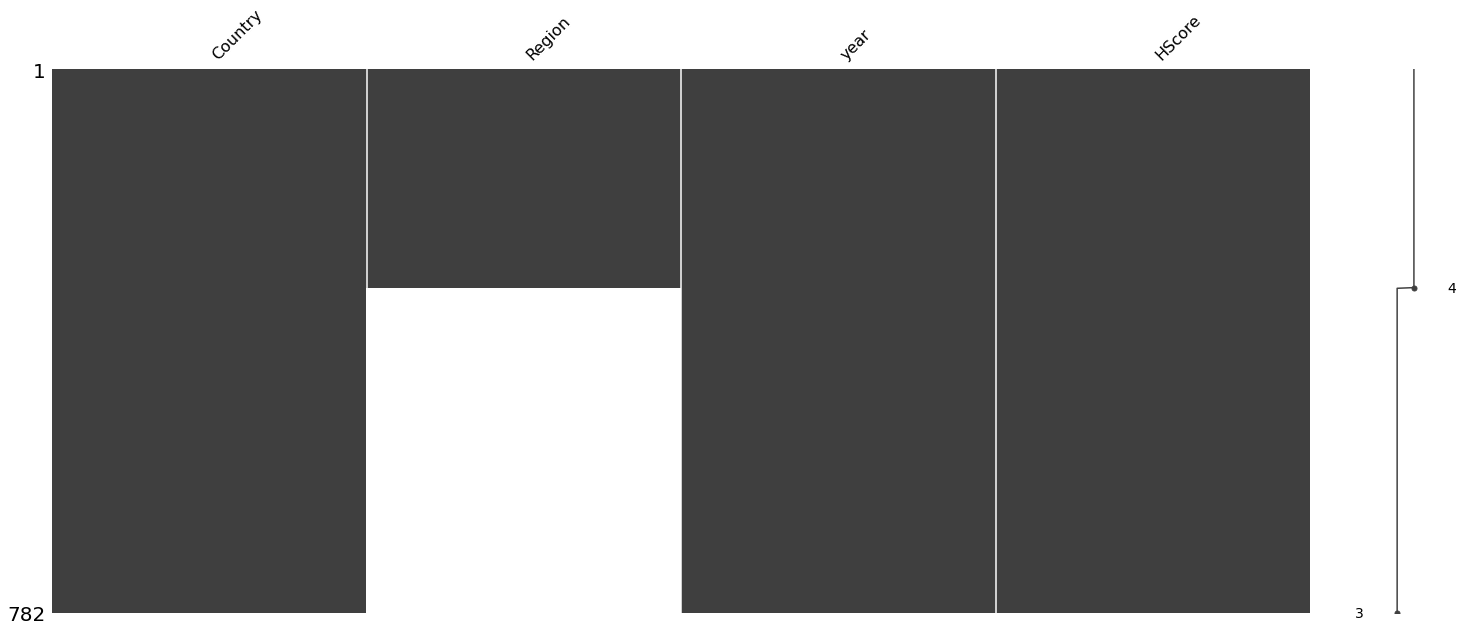

In [61]:
df_useful["Country"] = df_useful["Country"].str.cat(df_useful["Country or region"], na_rep="")
df_useful = df_useful.drop(["Country or region"], axis="columns")

mgno.matrix(df_useful)

In [62]:
df_useful["Country"] = df_useful["Country"].str.upper()

In [66]:
region_countries = df_useful.dropna().drop_duplicates(subset=['Country'])
region_countries = region_countries.drop(["year","HScore"],axis="columns")
region_countries.head()

,Country,Region
0,SWITZERLAND,Western Europe
1,ICELAND,Western Europe
2,DENMARK,Western Europe
3,NORWAY,Western Europe
4,CANADA,North America


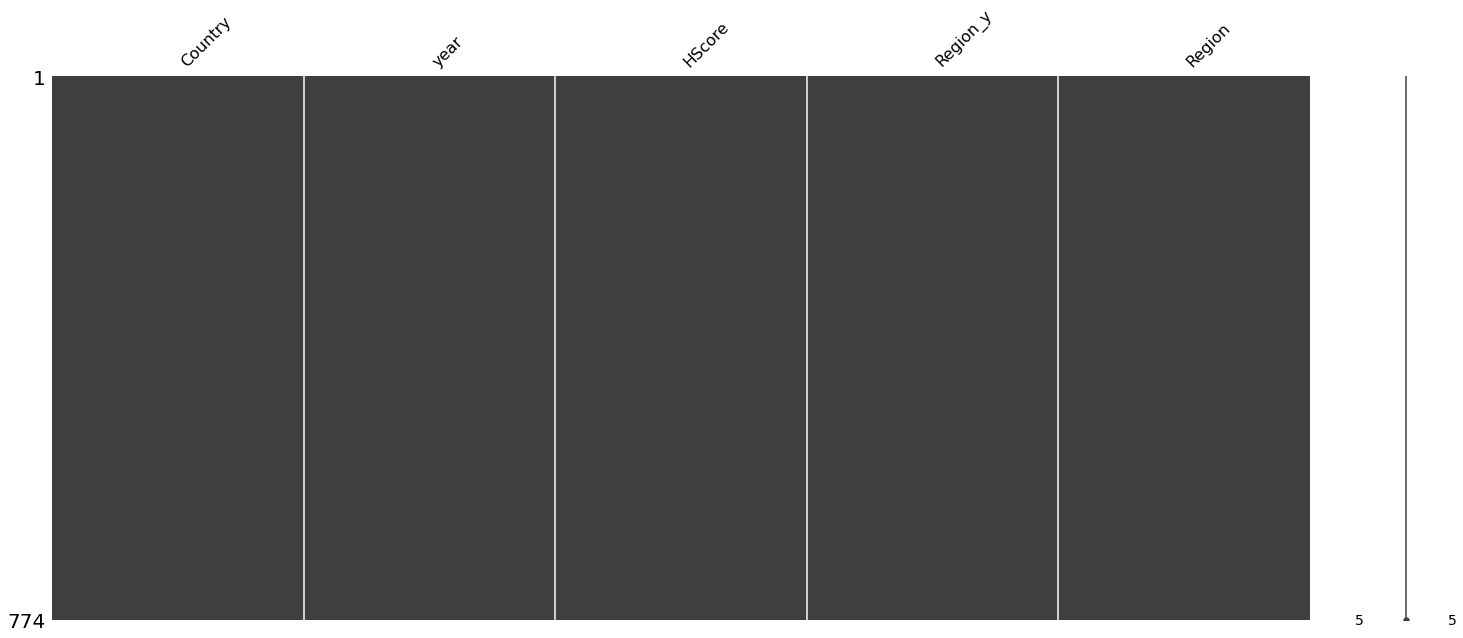

In [69]:
df_useful = df_useful.merge(region_countries, on=["Country"])
df_useful = df_useful.drop(["Region_x"], axis="columns")
mgno.matrix(df_useful)

2 - Tracer les variations du score de bonheur en fonction des années pour un pays donné (à choisir)

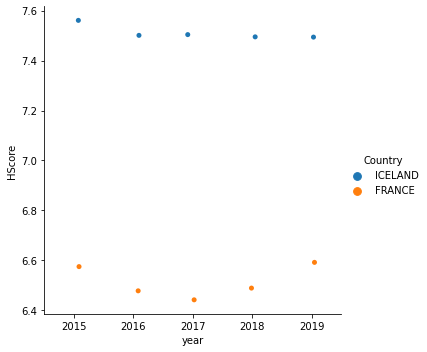

In [73]:
sns.catplot(x="year",y="HScore", hue="Country",data = df_useful[(df_useful["Country"]=="FRANCE") | (df_useful["Country"]=="ICELAND")])

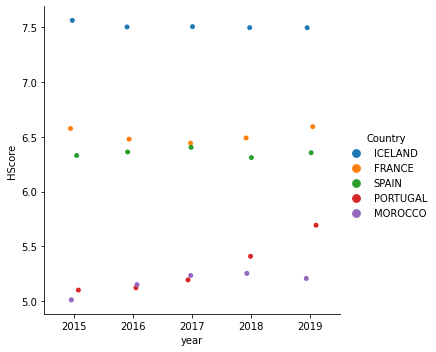

In [77]:
sns.catplot(x="year",y="HScore", hue="Country",data = df_useful[df_useful["Country"].isin(["FRANCE","ICELAND","MOROCCO","SPAIN","PORTUGAL"])])

3 - Comparer les moyennes des scores de bonheur par continent en fonction des années

In [78]:
moy_df = df_useful.groupby(by=["year","Region_y"]).mean()
moy_df

HScore
year Region_y                                 
2015 Australia and New Zealand        7.285000
     Central and Eastern Europe       5.332931
     Eastern Asia                     5.626167
     Latin America and Caribbean      6.144682
     Middle East and Northern Africa  5.406900
     North America                    7.273000
     Southeastern Asia                5.317444
     Southern Asia                    4.580857
     Sub-Saharan Africa               4.202800
     Western Europe                   6.689619
2016 Australia and New Zealand        7.323500
     Central and Eastern Europe       5.370690
     Eastern Asia                     5.624167
     Latin America and Caribbean      6.101750
     Middle East and Northern Africa  5.386053
     North America                    7.254000
     Southeastern Asia                5.338889
     Southern Asia                    4.563286
     Sub-Saharan Africa               4.136421
     Western Europe                   6.685667
2017 Australia and New Zealand        7.299000
     Central and Eastern Europe       5.409931
     Eastern Asia                     5.496500
     Latin America and Caribbean      5.957818
     Middle East and Northern Africa  5.369684
     North America                    7.154500
     Southeastern Asia                5.444875
     Southern Asia                    4.628429
     Sub-Saharan Africa               4.111949
     Western Europe                   6.703714
2018 Australia and New Zealand        7.298000
     Central and Eastern Europe       5.463966
     Eastern Asia                     5.672000
     Latin America and Caribbean      5.938619
     Middle East and Northern Africa  5.282737
     North America                    7.107000
     Southeastern Asia                5.313444
     Southern Asia                    4.603857
     Sub-Saharan Africa               4.195026
     Western Europe                   6.829100
2019 Australia and New Zealand        7.267500
     Central and Eastern Europe       5.571786
     Eastern Asia                     5.688833
     Latin America and Caribbean      5.942550
     Middle East and Northern Africa  5.237000
     North America                    7.085000
     Southeastern Asia                5.273667
     Southern Asia                    4.526857
     Sub-Saharan Africa               4.294513
     Western Europe                   6.898400

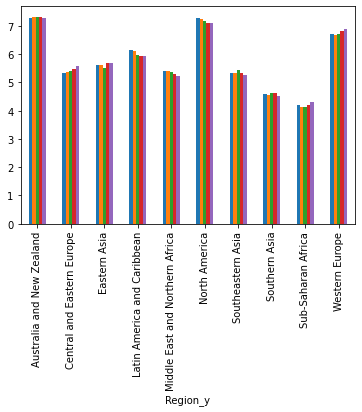

In [79]:
moy_df.unstack(level=0).plot(kind="bar", legend=False)